# Mobile Phone Usage and Performance Impact Analysis

## 1. Data Preparation

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [79]:
# Load dataset
data = pd.read_csv('PROJECT.csv')
data.head()

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Agree,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Neutral,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Strongly agree,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,Strongly agree,During Class Lectures,No,Internet Access,Only Partially,Reasarch,NaN,Never,Limiting Screen Time,Excellent
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,Agree,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent


In [80]:
# Drop missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Names                           91 non-null     object
 1   Age                             91 non-null     object
 2   Gender                          91 non-null     object
 3   Mobile Phone                    91 non-null     object
 4   Mobile Operating System         91 non-null     object
 5   Mobile phone use for education  91 non-null     object
 6   Mobile phone activities         91 non-null     object
 7   Helpful for studying            91 non-null     object
 8   Educational Apps                91 non-null     object
 9   Daily usages                    91 non-null     object
 10  Performance impact              91 non-null     object
 11  Usage distraction               91 non-null     object
 12  Attention span                  91 non-null     object
 1

In [81]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Convert categorical columns to 'category' data type
data[categorical_columns] = data[categorical_columns].astype('category')

## 2. Exploratory Data Analysis (EDA)

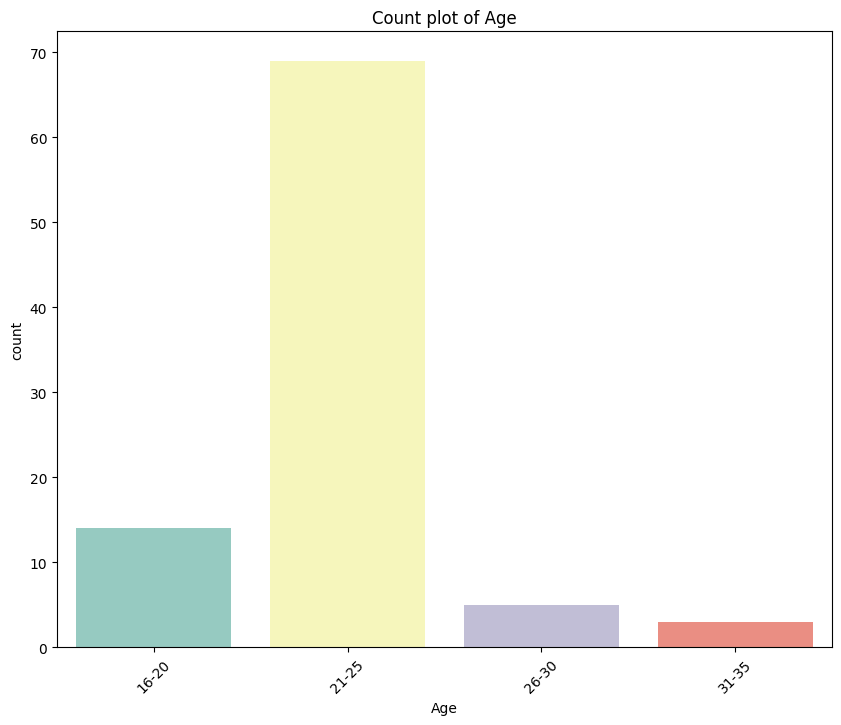

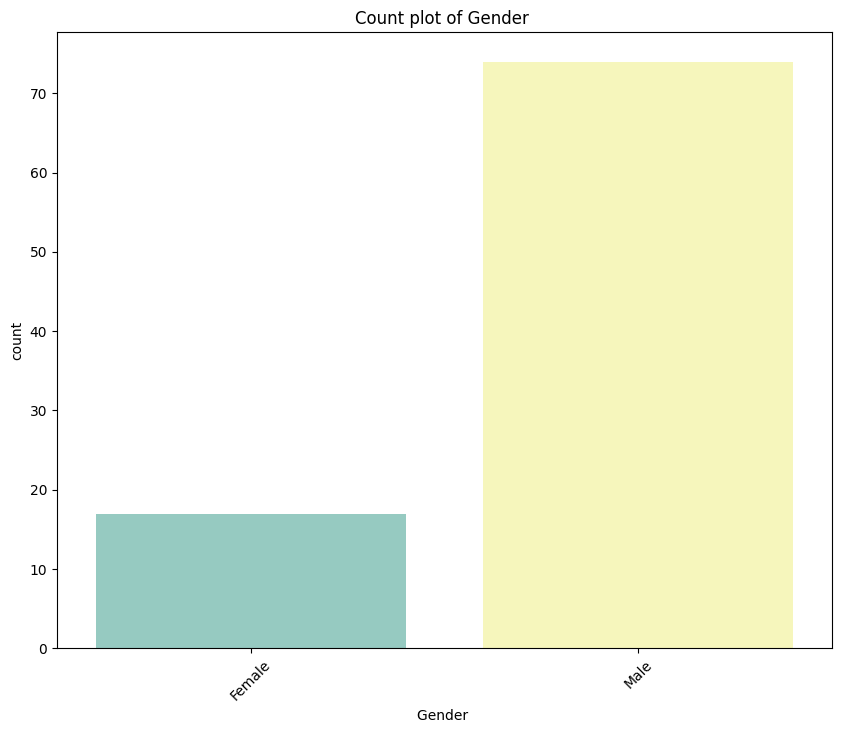

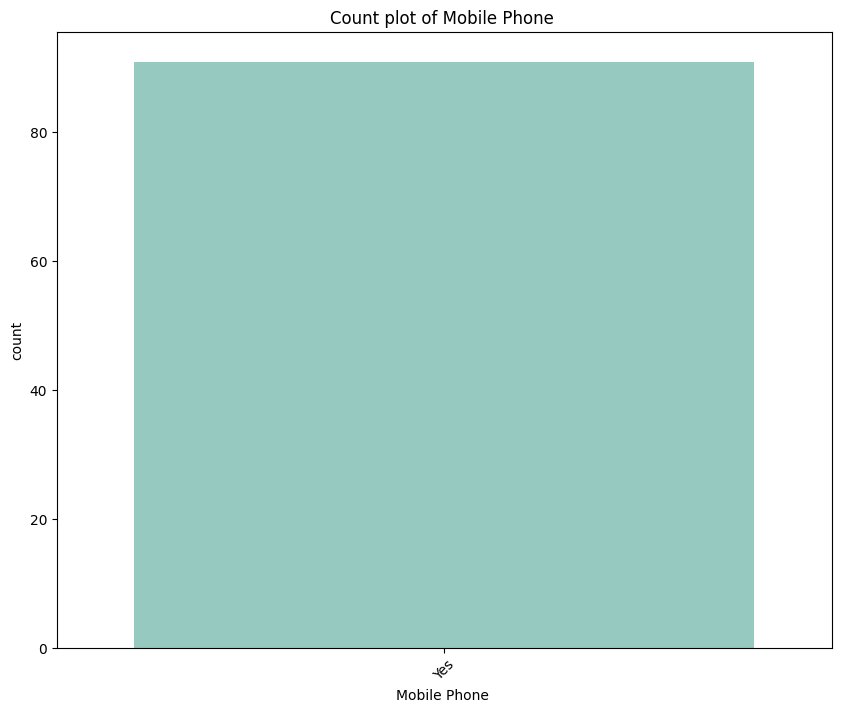

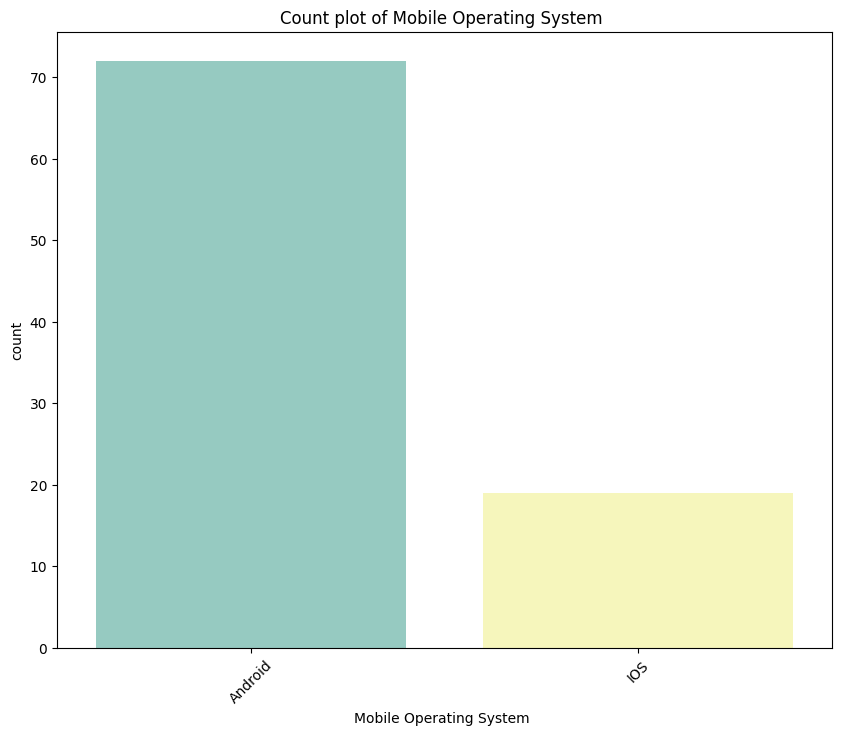

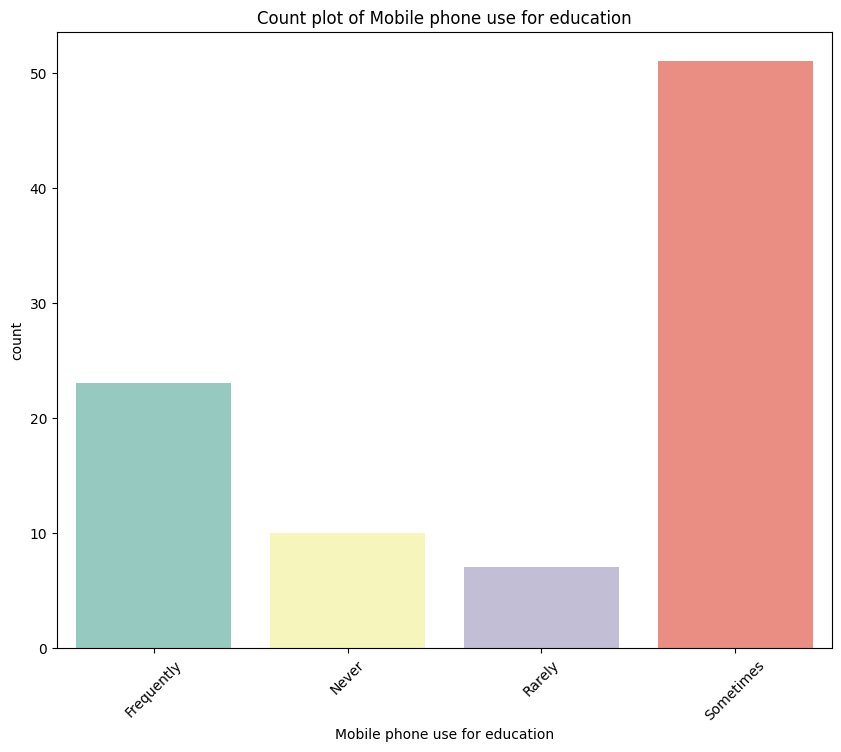

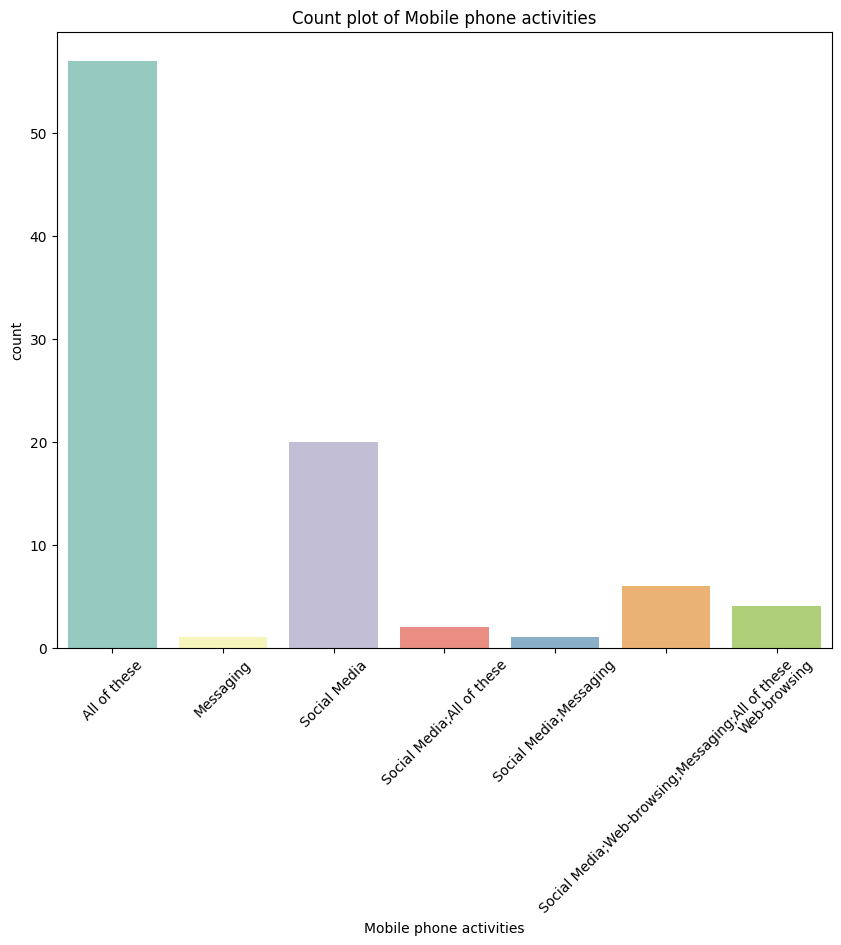

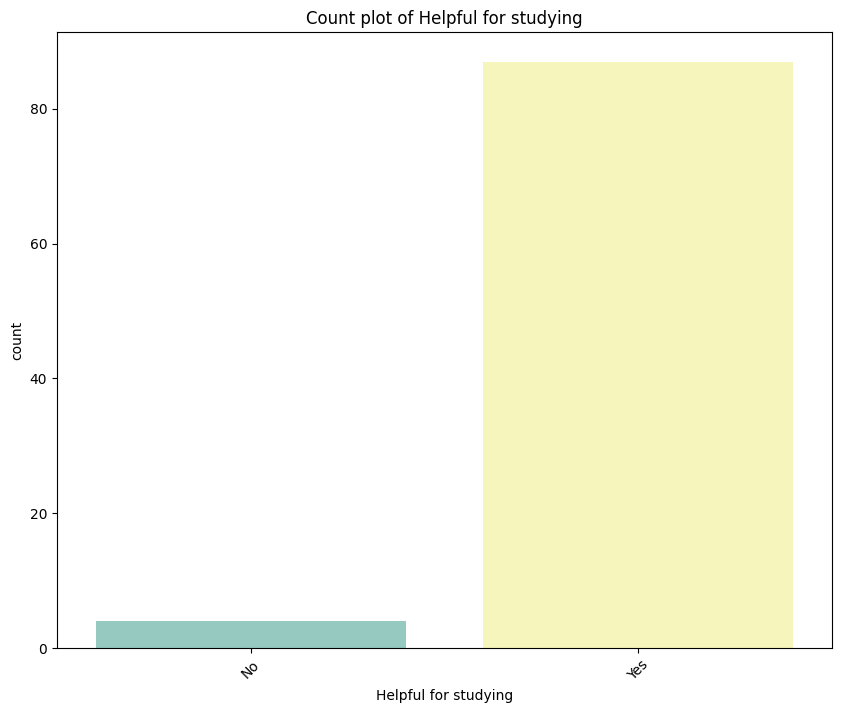

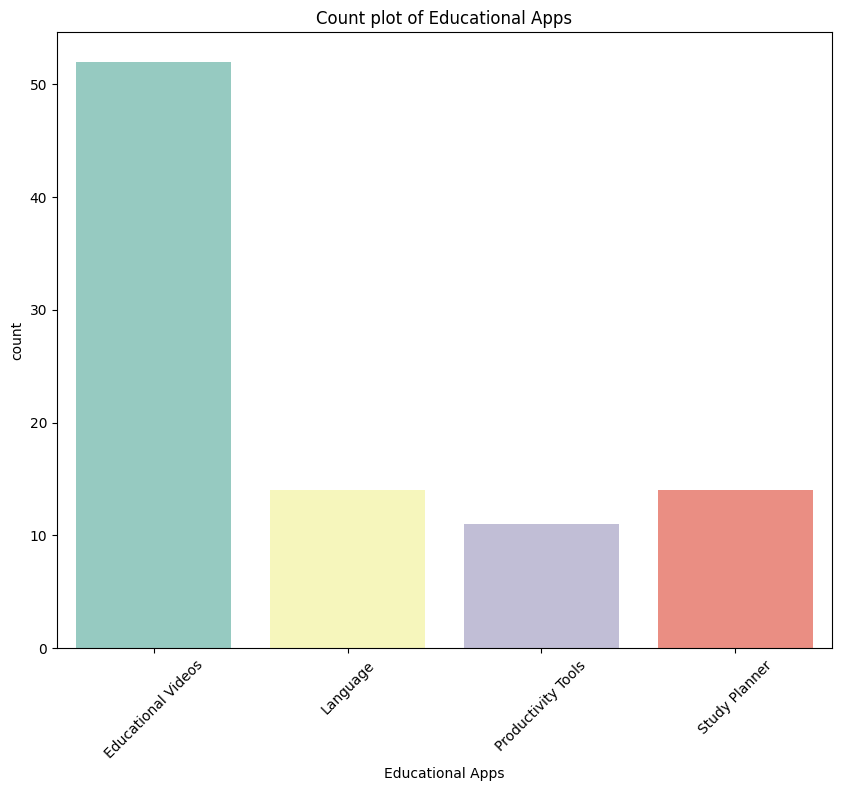

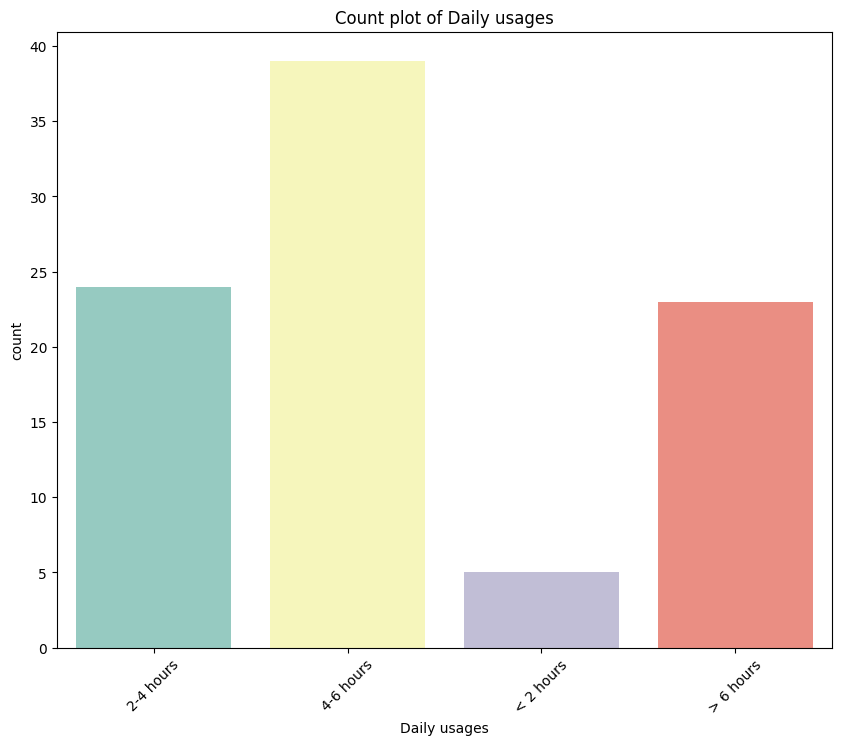

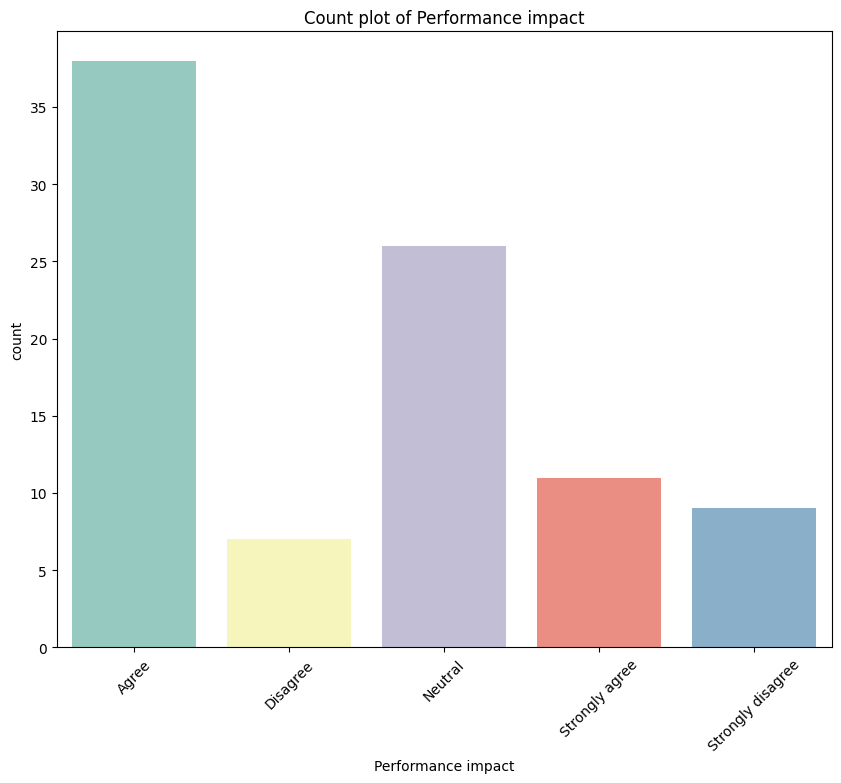

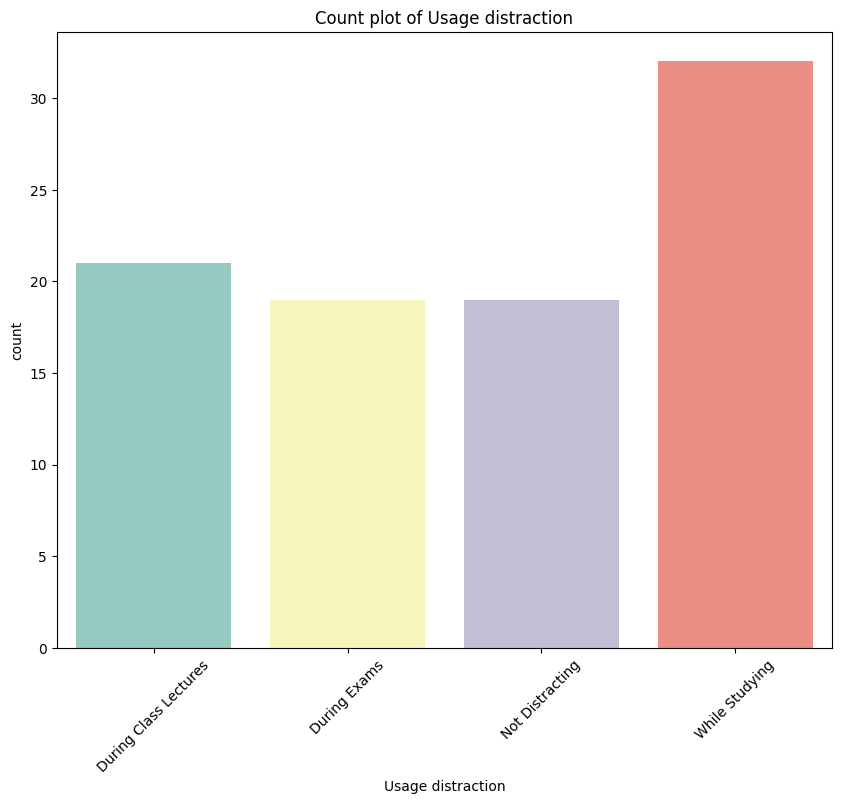

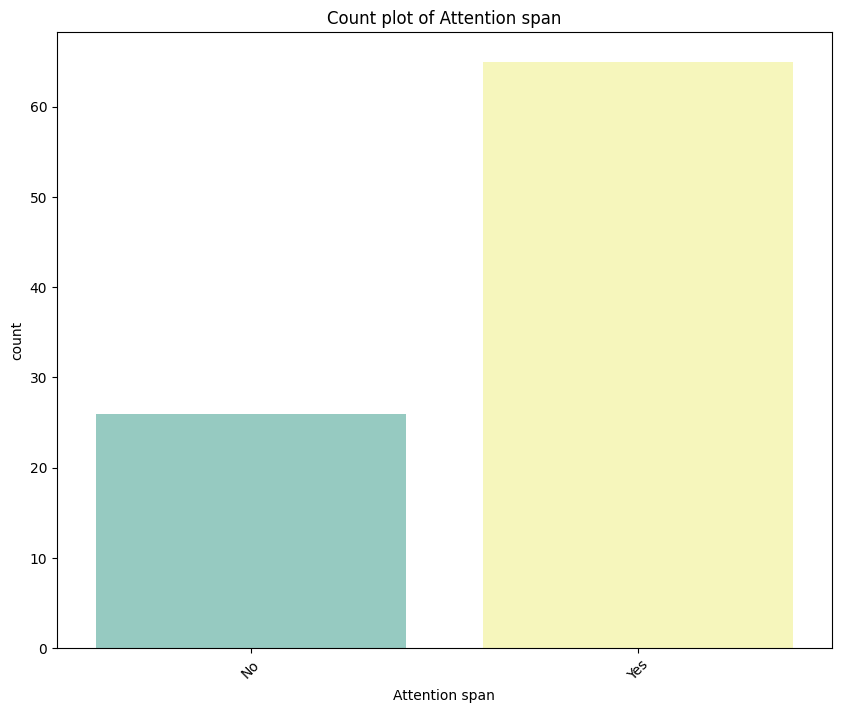

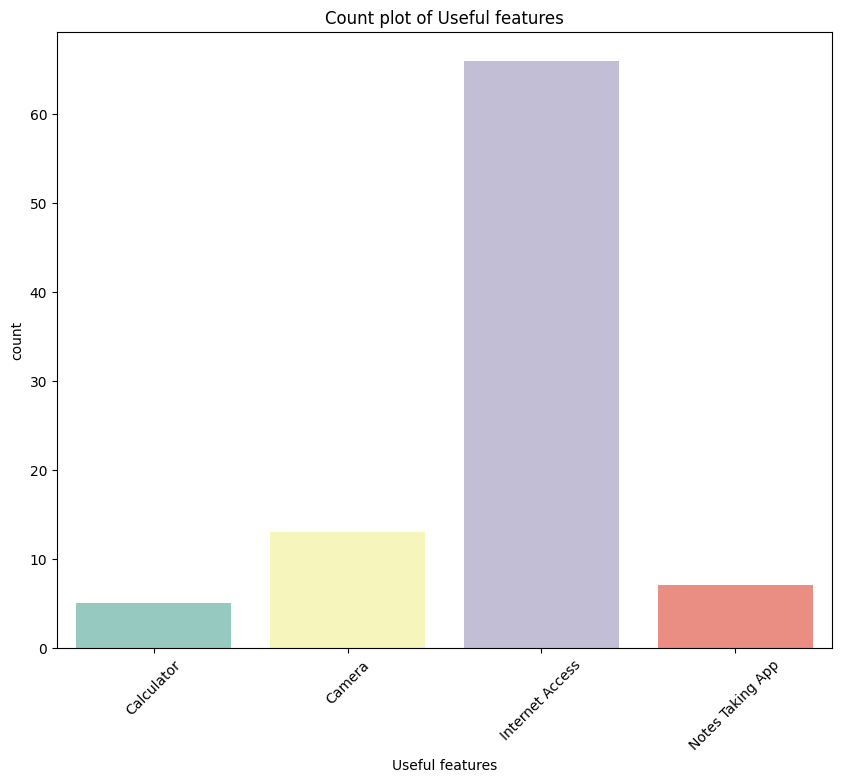

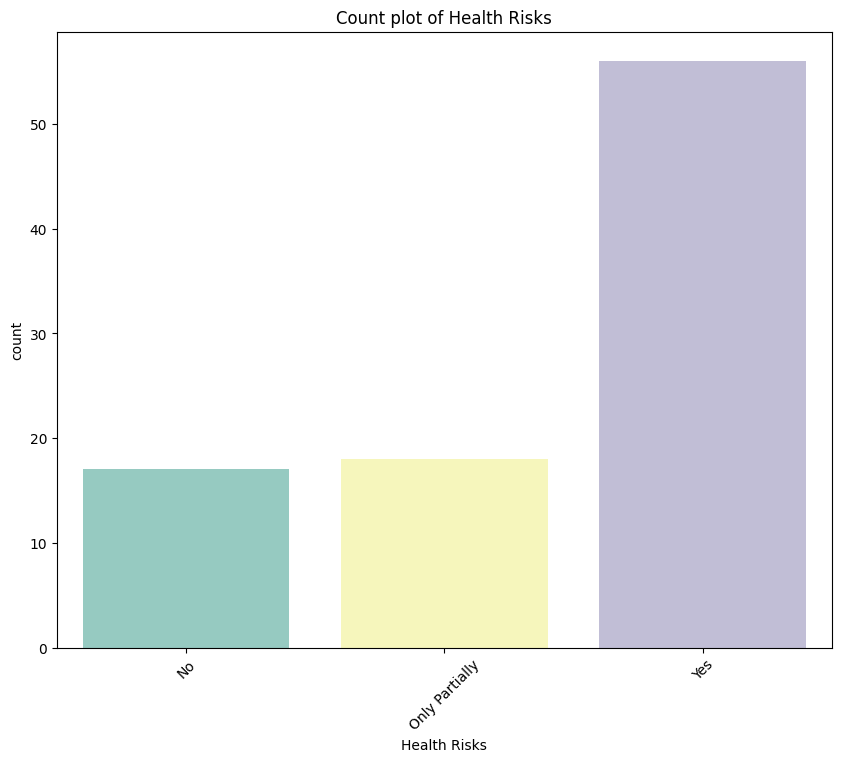

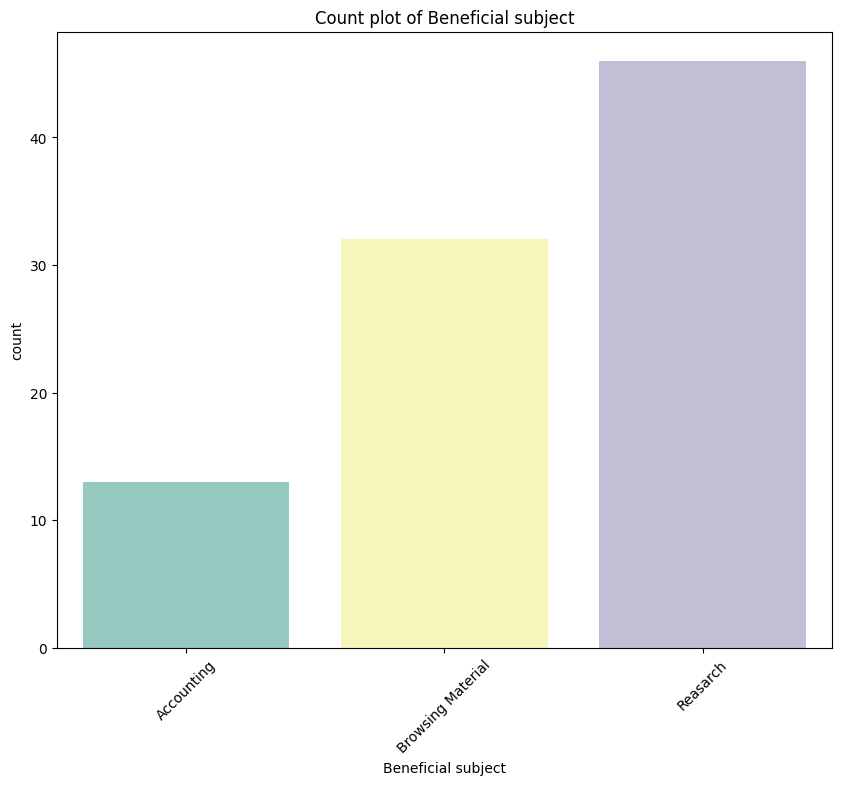

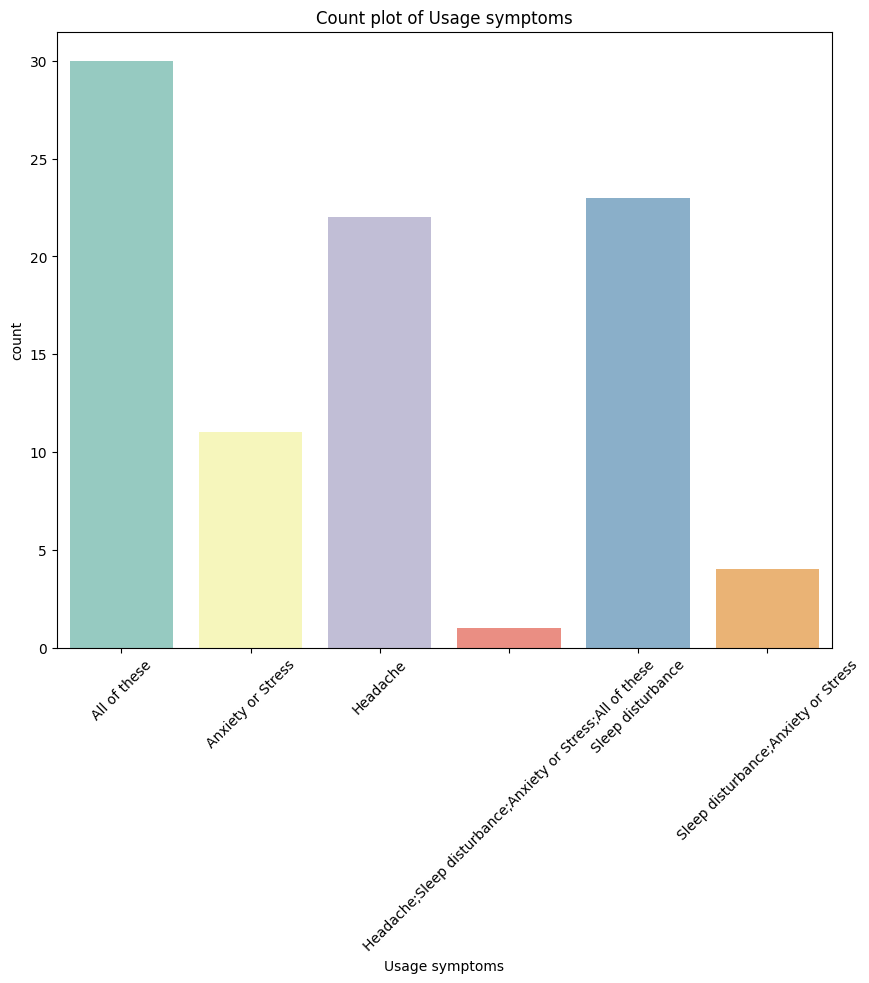

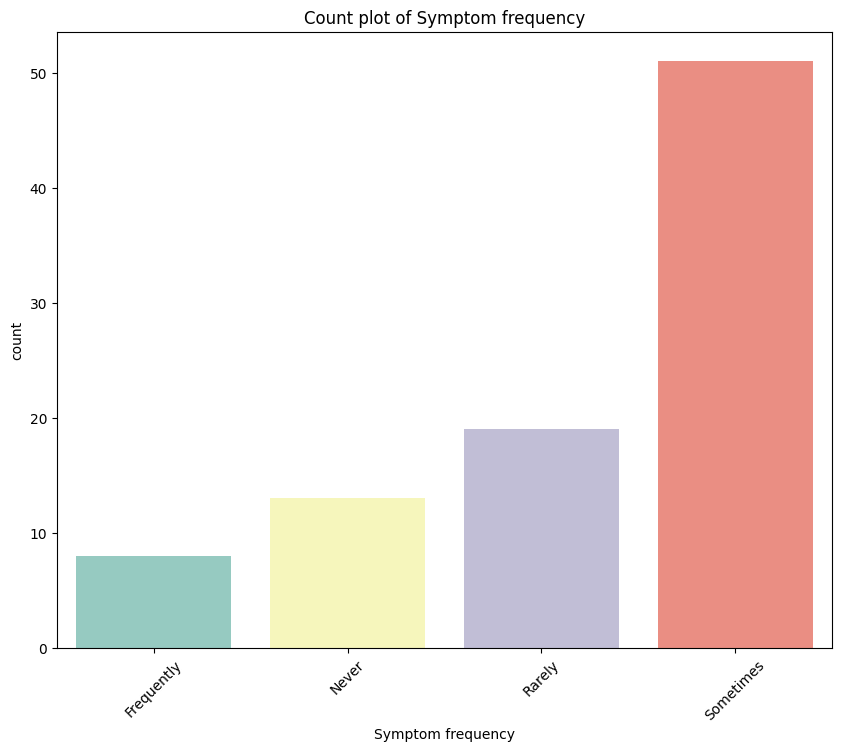

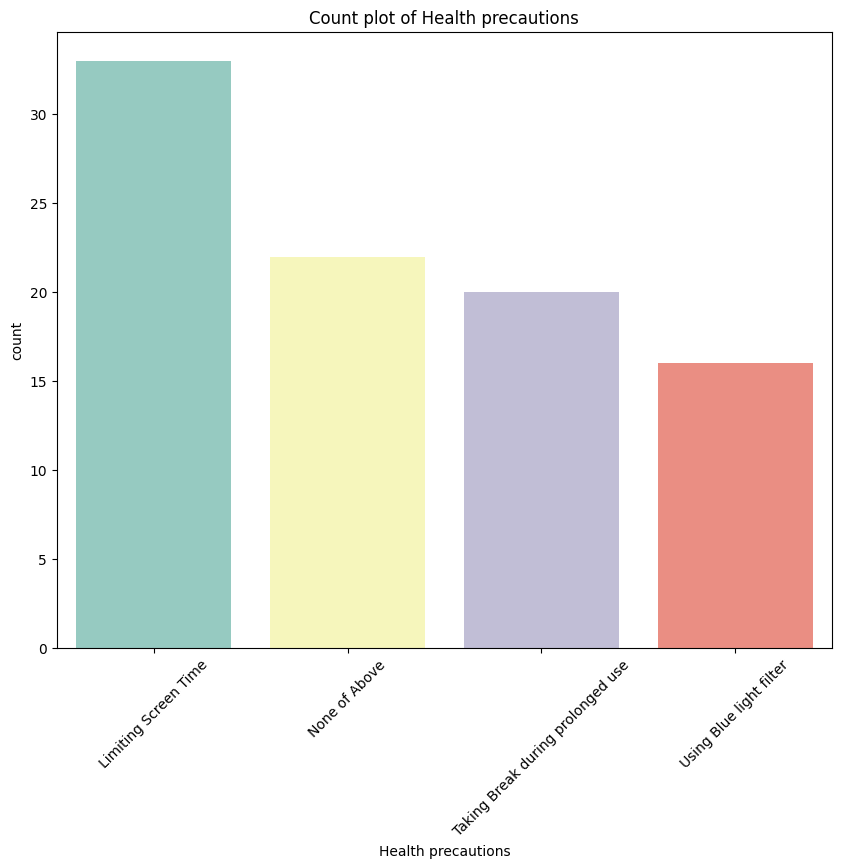

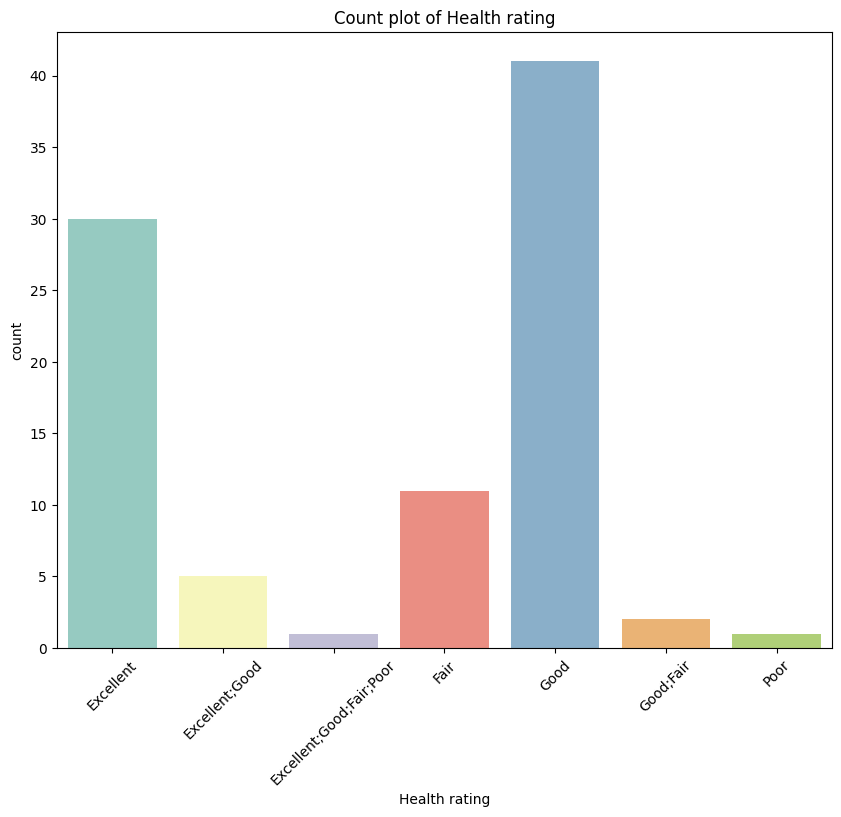

In [82]:
# Define the base color palette
base_palette = sns.color_palette("Set3")

# Plot count plots for each categorical column
for i, col in enumerate(categorical_columns):
    if i == 0:
        pass
    else:
        unique_values = data[col].nunique()
        palette = sns.color_palette("Set3", unique_values)
        plt.figure(figsize=(10, 8))  
        sns.countplot(x=col, data=data, palette=palette, hue=col, dodge=False)
        plt.title(f'Count plot of {col}')
        plt.xticks(rotation=45)  
        plt.legend([],[], frameon=False)  
        plt.show()

## 3. Symptom Frequency vs Usage Symptoms


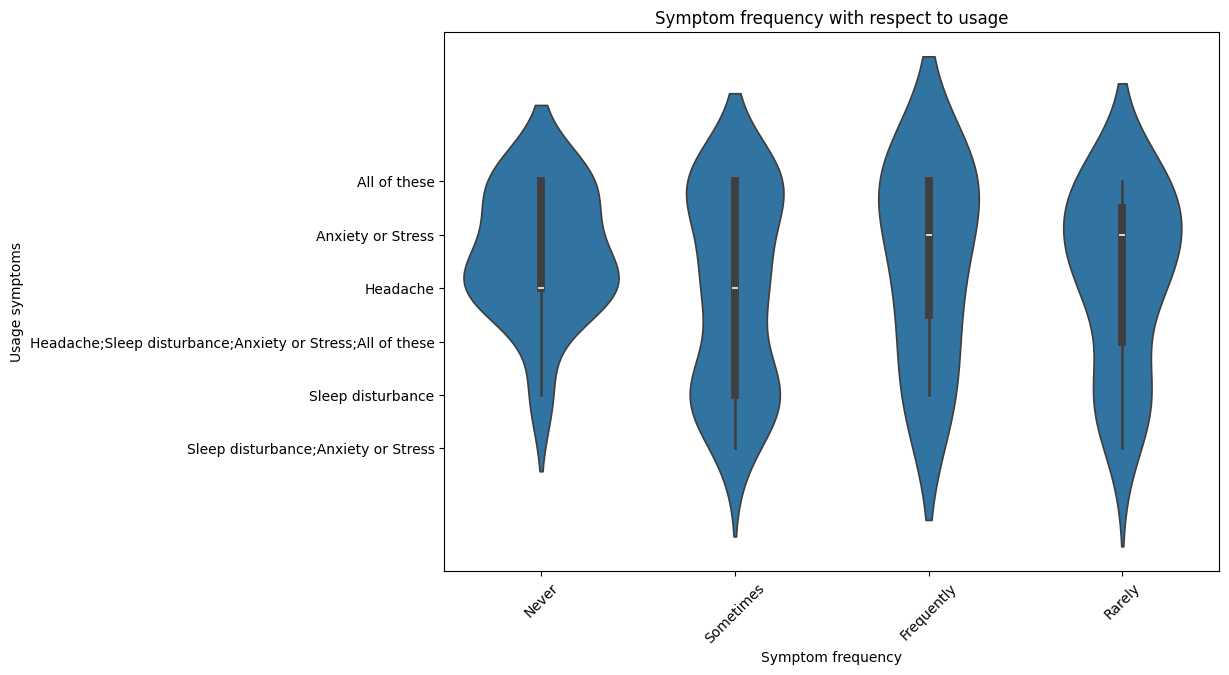

In [83]:



import seaborn as sns

usage_symptoms = ['Never', 'Sometimes', 'Frequently', 'Rarely']

plt.figure(figsize=(10, 7))
sns.violinplot(x='Symptom frequency', y='Usage symptoms', data=data, order=usage_symptoms)
plt.title('Symptom frequency with respect to usage')
plt.xlabel('Symptom frequency')
plt.ylabel('Usage symptoms')
plt.xticks(rotation=45)
plt.show()

## 4. Chi-square Test

Chi-square statistic: 26.794580616879784
P-value: 0.31411905114874566
Degrees of freedom: 24
Expected frequencies: 
[[23.8021978   4.38461538 16.28571429  6.89010989  5.63736264]
 [ 0.41758242  0.07692308  0.28571429  0.12087912  0.0989011 ]
 [ 8.35164835  1.53846154  5.71428571  2.41758242  1.97802198]
 [ 0.83516484  0.15384615  0.57142857  0.24175824  0.1978022 ]
 [ 0.41758242  0.07692308  0.28571429  0.12087912  0.0989011 ]
 [ 2.50549451  0.46153846  1.71428571  0.72527473  0.59340659]
 [ 1.67032967  0.30769231  1.14285714  0.48351648  0.3956044 ]]


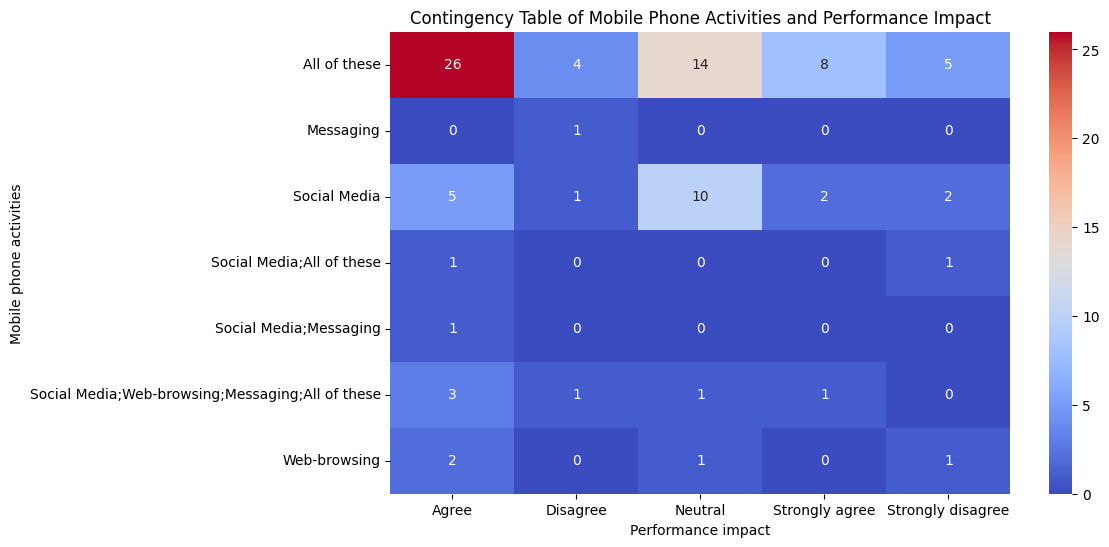

In [84]:
# Assuming 'data' is the DataFrame
contingency_table = pd.crosstab(data['Mobile phone activities'], data['Performance impact'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')
print(f'Degrees of freedom: {dof}')
print(f'Expected frequencies: \n{expected}')

# Visualize the contingency table using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="coolwarm", fmt='d')
plt.title('Contingency Table of Mobile Phone Activities and Performance Impact')
plt.show()


## 5. Health Precautions vs Usage Symptoms

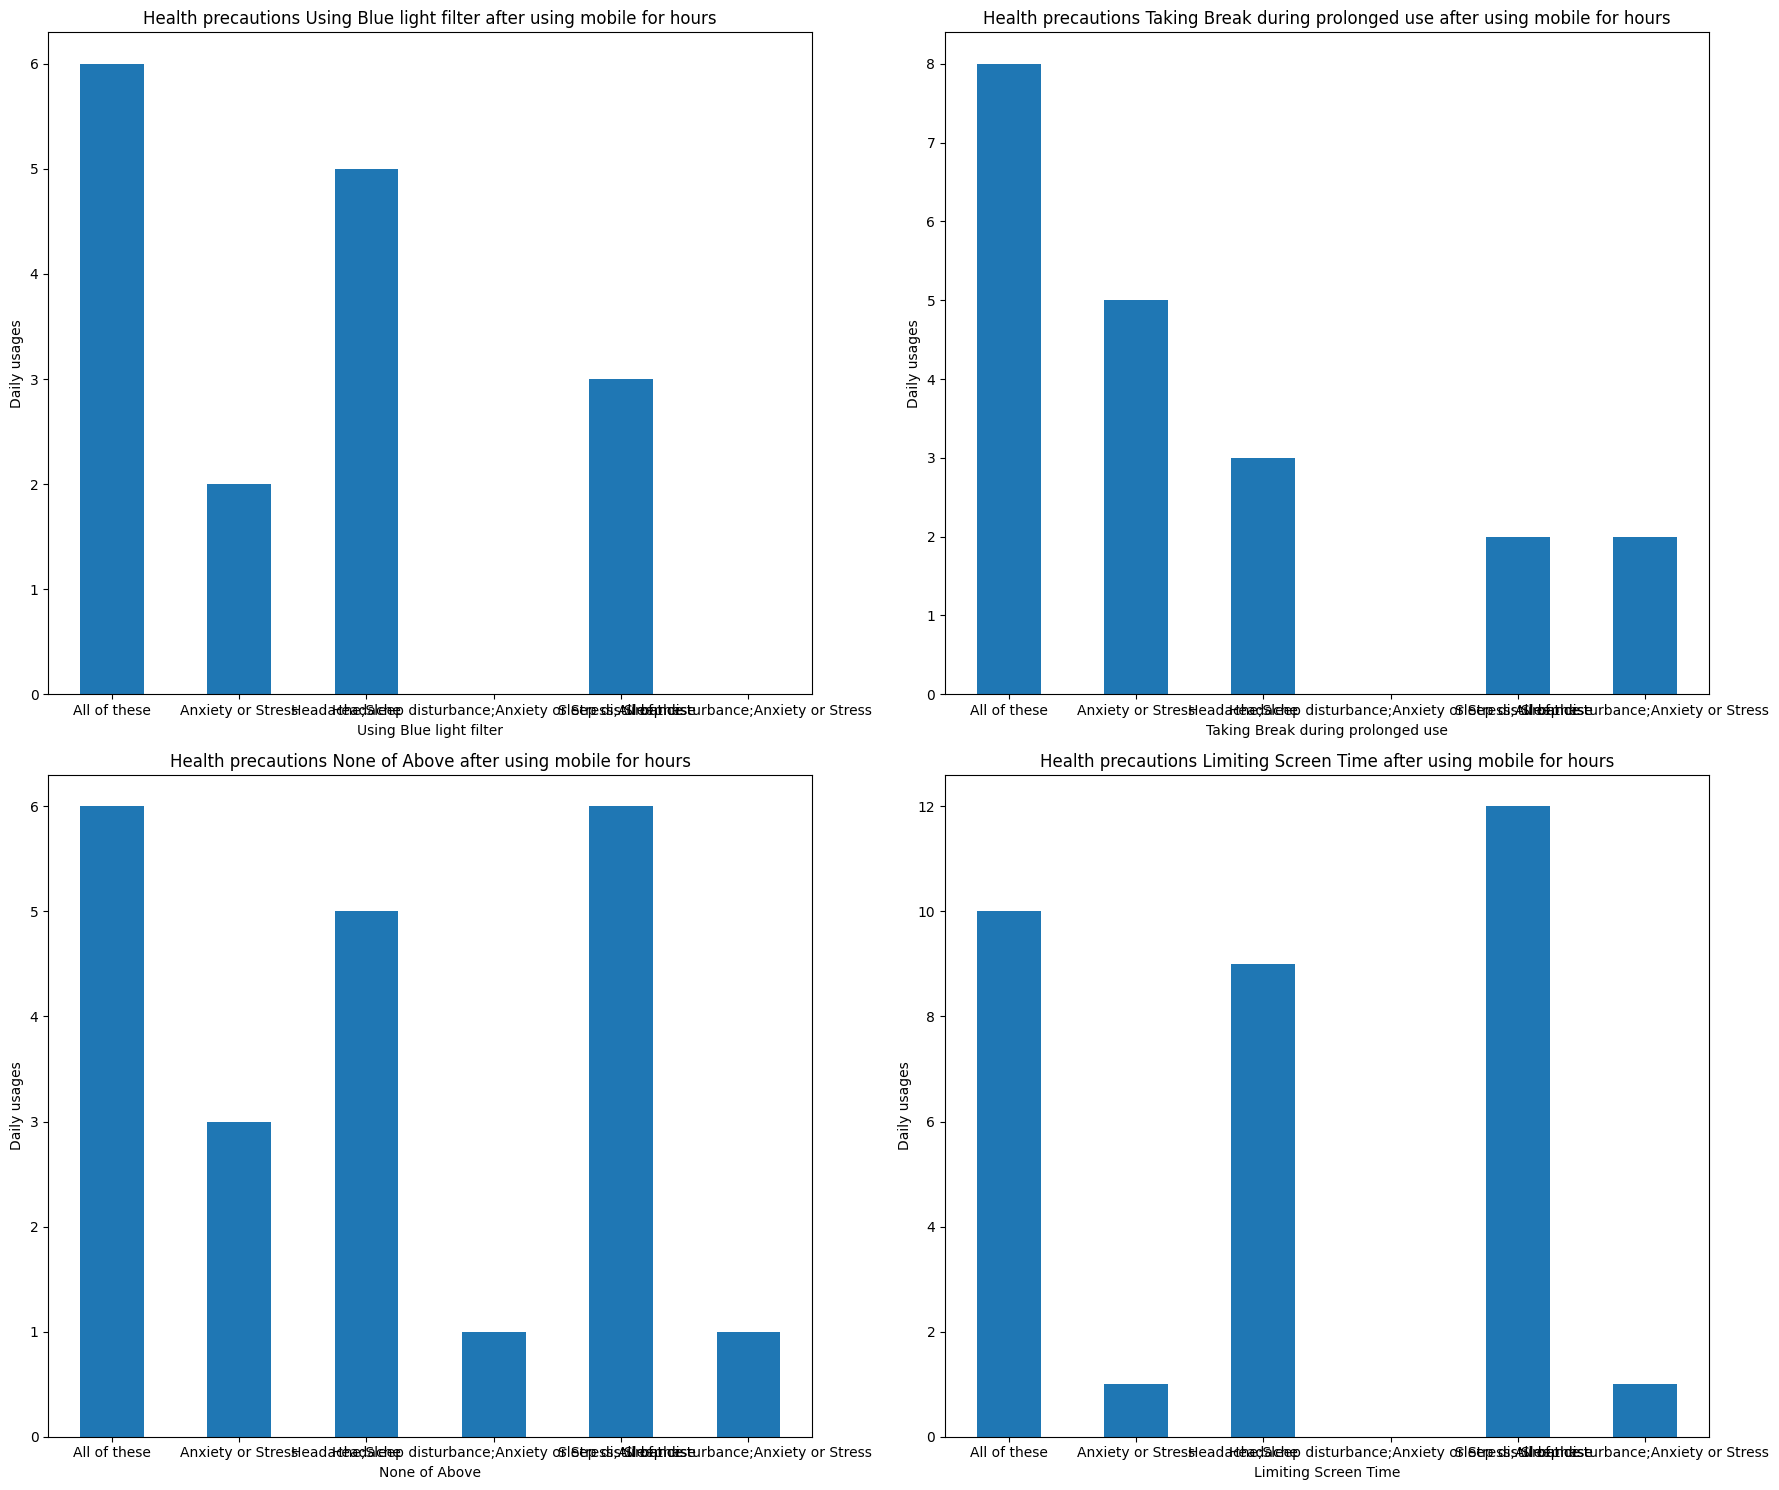

In [85]:
data['Health precautions'].unique()

precautions = ['Using Blue light filter', 'Taking Break during prolonged use',
       'None of Above', 'Limiting Screen Time']

num_plots = len(precautions)
cols = 2
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18,15))
axes = axes.flatten()  

for i, prep in enumerate(precautions):
    ax = axes[i]
    precautions = data[data['Health precautions'] == prep]
    usage = precautions['Usage symptoms'].value_counts().sort_index()
    
    usage.plot(kind='bar', ax=ax)
    ax.set_title(f'Health precautions {prep} after using mobile for hours')
    ax.set_xlabel(prep)
    ax.set_ylabel('Daily usages')
    ax.set_xticks(range(len(usage.index)))
    ax.set_xticklabels(usage.index, rotation=0)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## 6. Data Encoding and Splitting

In [86]:
# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature selection and train/test split
X = data.drop('Performance impact', axis=1)
y = data['Performance impact']

# Avoid data leakage by proper splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 7. Model Training and Hyperparameter Tuning


In [87]:
 #Model Training and Evaluation
# Grid search for hyperparameters for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print(f'Best parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_de

In [88]:

# Model training with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=4, random_state=42)

## 8. Feature Importance

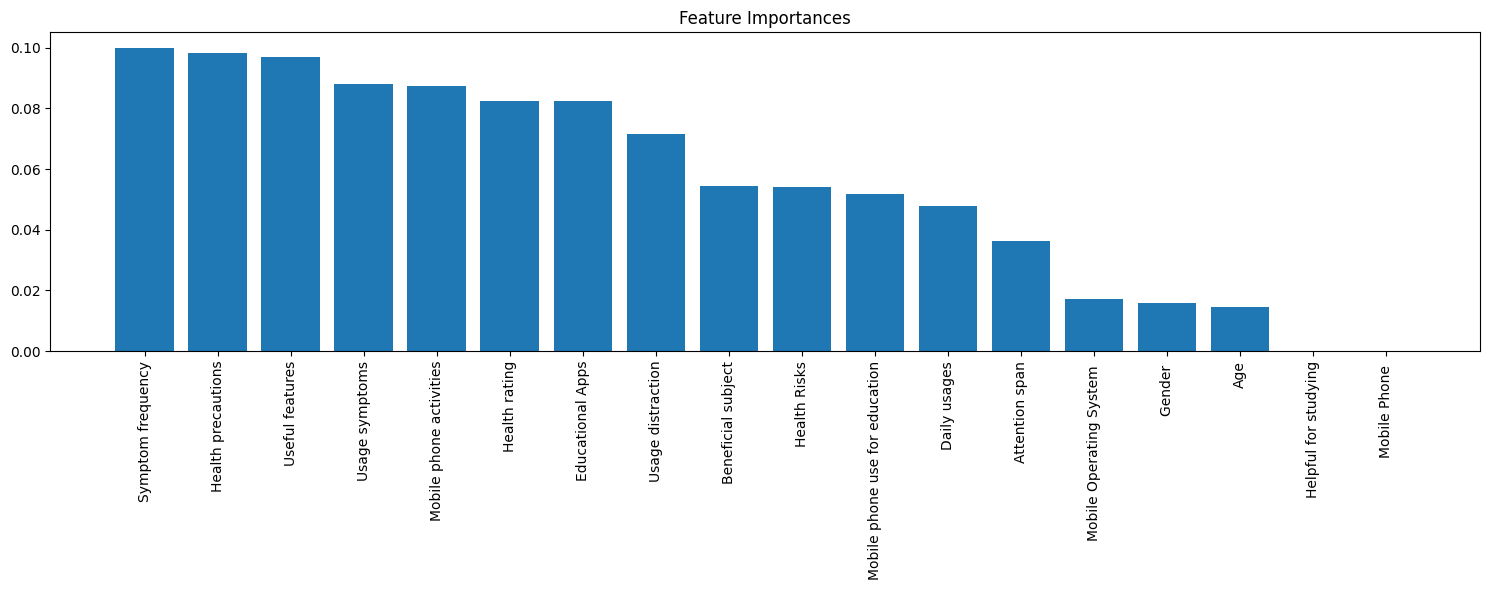

In [89]:
# Drop the 'Names' column
X = data.drop(columns=['Names', 'Performance impact'])
y = data['Performance impact']

# Re-split the data to ensure 'Names' is excluded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training with the best parameters from GridSearchCV
best_model.fit(X_train, y_train)

# Feature importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


## 9. Model Evaluation

In [90]:
 #Generate predictions
y_pred = best_model.predict(X_test)


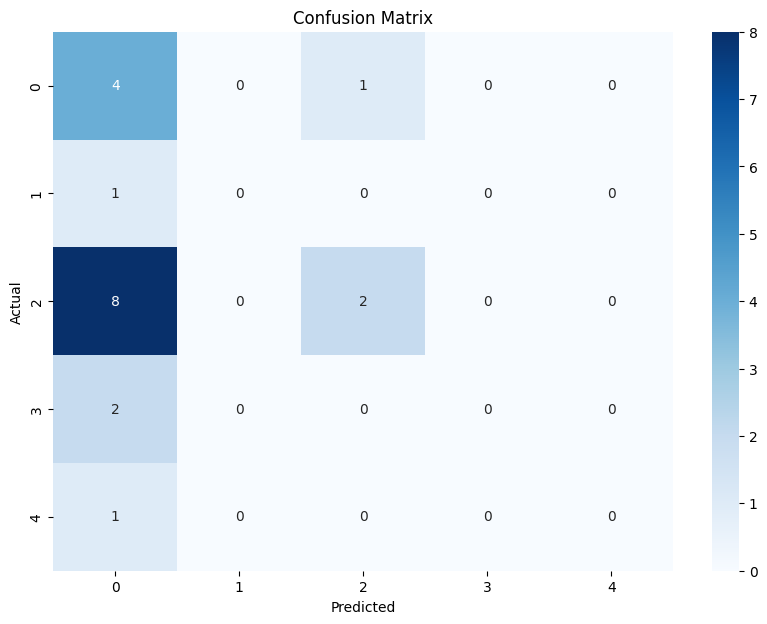

In [91]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [92]:
# Overfitting and underfitting assessment
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
if train_accuracy > test_accuracy + 0.1:
    print("The model might be overfitting. Consider using techniques like cross-validation, pruning, or regularization.")
elif train_accuracy < test_accuracy:
    print("The model might be underfitting. Consider using a more complex model or adding more features.")

Training Accuracy: 0.625
Test Accuracy: 0.3157894736842105
The model might be overfitting. Consider using techniques like cross-validation, pruning, or regularization.


In [93]:
# Sample predictions
sample_predictions = best_model.predict(X_test[:5])
print(f'Sample Predictions: {sample_predictions}')
print(f'Actual Values: {y_test[:5]}')

Sample Predictions: [2 0 0 0 2]
Actual Values: 41    2
23    2
57    0
97    0
0     0
Name: Performance impact, dtype: int64


In [94]:
# Decision Tree Visualization
# Drop the target column and prepare X and y
X = data.drop(columns=['Names', 'Performance impact'])
y = data['Performance impact']

In [95]:
# Encode target variable
le_y = LabelEncoder()
y = le_y.fit_transform(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and fit the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

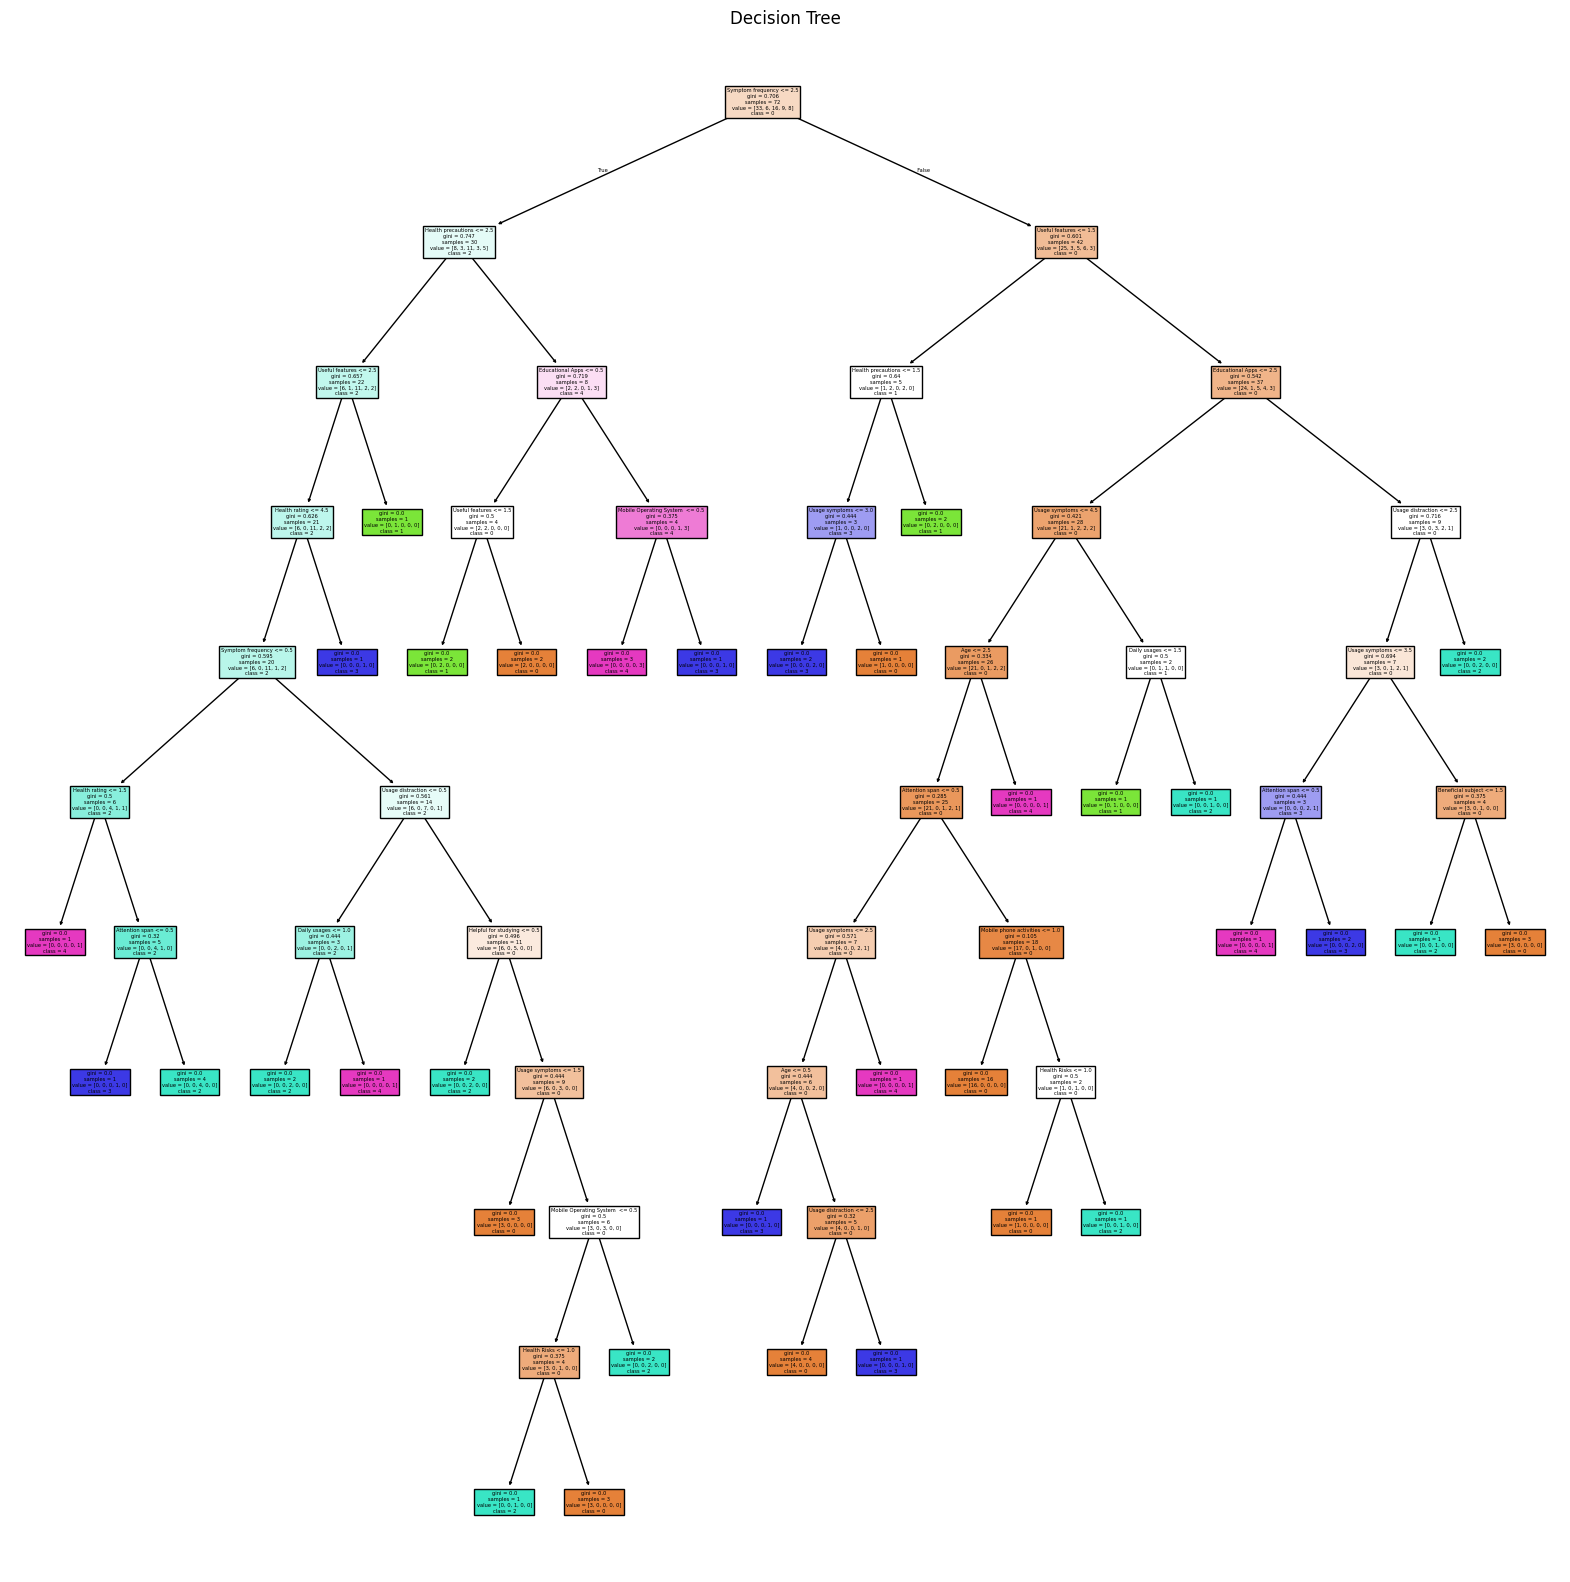

In [96]:
# Predict probabilities
y_pred_proba = tree_model.predict_proba(X_test)

# Visualize the decision tree
plt.figure(figsize=(20, 20))
class_names = [str(cls) for cls in le_y.classes_]
plot_tree(tree_model, feature_names=X.columns, class_names=class_names, filled=True)
plt.title('Decision Tree')
plt.show()